# Data processing step by step

## Below are the libraries used: 
 From these, only os and cv2 are necessary for the actual image processing, while matplotlib is used to show intermediate steps

In [1]:
import os
import cv2
import matplotlib.pyplot as plt


## Read step
Reading the image is straightforward, just load it in. The coloring is an extra step done just in this file, not the actual processor,
to be able to show the image having the right color

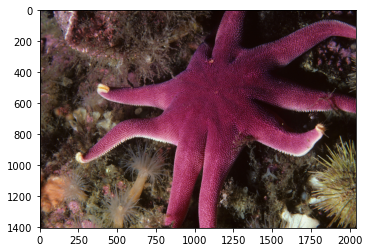

In [3]:
filenames = os.listdir("./DIV2K_train_HR/")
scale = 3

crop_size_lr = 32
crop_size_hr = 32

filename = filenames[0]

image_file = "./DIV2K_train_HR/" + filename
image_decoded = cv2.imread(image_file)
image_decoded = cv2.cvtColor(image_decoded, cv2.COLOR_BGR2RGB)

plt.imshow(image_decoded)

## Crop step
The image is being cropped to make it's shape divisible by the shape we want, which in our case is 32x32, so in case we have an image of shape 356x400, the resulting image would be of shape 352x384 (notice that both dimensions are now divisible by 32). This is done by discarding the last columns and rows of the image

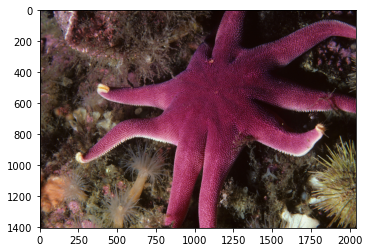

In [4]:
cropped = image_decoded[0:(image_decoded.shape[0] - (image_decoded.shape[0] % scale)),
            0:(image_decoded.shape[1] - (image_decoded.shape[1] % scale)), :]

plt.imshow(cropped)

## Resize step
This takes the image and lowers it's resolution by scale. In our case, the scale is 3 (3 times smaller images, in all dimensions, so the area would go down 9 folded)

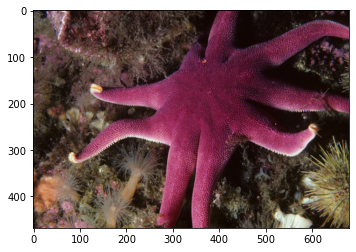

In [6]:
lr = cv2.resize(cropped, (int(cropped.shape[1] / scale), int(cropped.shape[0] / scale)),
                interpolation=cv2.INTER_AREA)

plt.imshow(lr)

## Upscale step
Here we take the lower resolution image, and resize it back to the original dimensions, using an usual interpolation technique

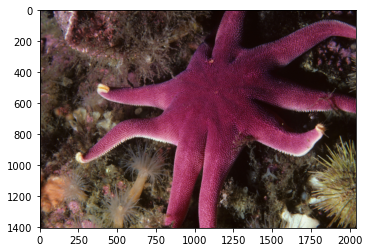

In [7]:
upscaled = cv2.resize(lr, (lr.shape[1] * scale, lr.shape[0] * scale), interpolation=cv2.INTER_AREA)

plt.imshow(upscaled)

## 2nd crop step
This is a more special crop step, since it takes both images and reduces their size to the actual 32x32 we want for our training. How it works, is it basically splits the image into numx * numy windows, windows that do not cross each other (like how a convolution layer with stride = filter_size would work), so from a single image we can generate numx * numy smaller images. This is very helpful because it both reduces the size on disk of the images, and it also creates more training examples. Training on the actual images would be really unfeasible, for multiple reasons: 
1. The images are too large
2. The images will often not be of the same shape, so we need to resize them to have the same shape
3. Resizing images without keeping the aspect ratio will lead to a skewed result
4. This generated for me 37812 (in the actual processor at ./data_processor_1.py, because I only took every 4th image from the small crops), which is a lot better than training on 800 images

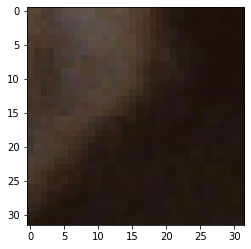

In [8]:
numx = int(upscaled.shape[0] / crop_size_lr)
numy = int(upscaled.shape[1] / crop_size_lr)

startx = 20 * crop_size_lr
endx = (20 * crop_size_lr) + crop_size_lr
starty = 20 * crop_size_lr
endy = (20 * crop_size_lr) + crop_size_lr

crop_lr = upscaled[startx:endx, starty:endy, :]
crop_hr = cropped[startx:endx, starty:endy, :]

plt.imshow(crop_hr)

# hr = crop_hr.reshape((crop_size_hr, crop_size_hr, 3))
# lr = crop_lr.reshape((crop_size_lr, crop_size_lr, 3))

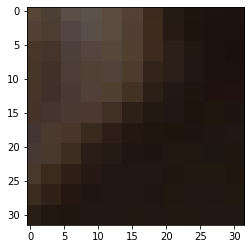

In [9]:
plt.imshow(crop_lr)